Análise das variaveis, são 10 variaveis, neste jupyter vamos fazer a regressão de todas as variaveis, comparando uma com as outras, para saber a importancia, o lance de rejeitar a hipotese nula, o r quadrado o onibus...

## Regressão Linear

Importando as bilbiotecas:

In [1]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import probplot, norm
import matplotlib.pyplot as plt

Abrindo o dataset.

In [2]:
dados = pd.read_csv('featuresdf1.csv')
dados.head()

,Unnamed: 0,id,name,artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0802,0.5810,0.000000,0.0931,0.931,95.977
1,1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,0.1200,0.2290,0.000000,0.0924,0.813,88.931
2,2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,0.1700,0.2090,0.000000,0.1120,0.846,177.833
3,3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0317,0.0498,0.000014,0.1640,0.446,103.019
4,4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,0.0367,0.0552,0.000000,0.1670,0.811,80.924


Definindo a função de regressão.

In [3]:
def regre(x, y):
    X = sm.add_constant(x)
    model = sm.OLS(y, x)
    result = model.fit()
    return result

# ANÁLISE DAS VARIÁVEIS

Com o dataset definido, e a partir da análise exploratória, verificamos a relação existente entre cada uma das variáveis.

### Primeira variável a ser analisada: energy

In [4]:
quant1 = ['danceability','speechiness', 'instrumentalness', 'liveness', 'valence', 'loudness','key','acousticness']

In [5]:
quant1_x = quant1.copy()

In [6]:
re1 = regre(dados.loc[:, quant1], dados.energy)
re1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     199.0
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           1.31e-54
Time:                        18:16:28   Log-Likelihood:                 42.759
No. Observations:                 100   AIC:                            -69.52
Df Residuals:                      92   BIC:                            -48.68
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability         0.5795      0.116      4.998      0.000       0.349       0.810
speechiness         -0.0746      0.198     -0.377      0.707      -0.467       0.318
instrumentalness     0.9922      0.646      1.536      0.128      -0.290       2.275
liveness             0.6981      0.201      3.475      0.001       0.299       1.097
valence              0.2525      0.093      2.706      0.008       0.067       0.438
loudness             0.0070      0.010      0.695      0.489      -0.013       0.027
key                  0.0115      0.004      2.653      0.009       0.003       0.020
acousticness        -0.1062      0.106     -1.005      0.317      -0.316       0.104
==============================================================================
Omnibus:                        0.538   Durbin-Watson:                   2.253
Prob(Omnibus):                  0.764   Jarque-Bera (JB):                0.664
Skew:                           0.044   Prob(JB):                        0.717
Kurtosis:                       2.611   Cond. No.                         336.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

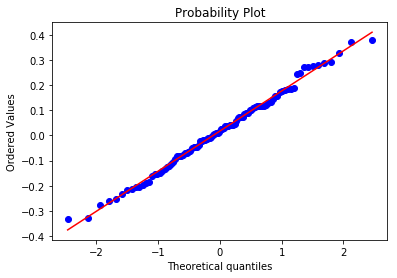

In [7]:
probplot(re1.resid, dist='norm', plot=plt);

Fazendo uma análise da variável 'energy', podemos observar que as probabilidades de Omnibus e de Jarque-Bera(JB) não são nulas, portanto, podemos confiar nos valores do p value mostrados na tabela. Como o p value da variável 'tempo' é um valor muito alto, chegamos à hipótese de que talvez não tenha tanta relevância se comparado à variável 'energy', e, assim, pode ser descartado. Pelo gráfico, observamos que a distibuição se aproxima de uma normal, e, como obtivemos um bom índice do R-squared (59%), podemos dizer que a variável 'energy' é fortemente relacionada com as demais.

### Segunda variavel a ser analisada: danceability - R2 ALTO, PVALUE ALTO

In [8]:
quant2 = ['speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness','key','acousticness', 'energy']

In [9]:
quant2_x = quant2.copy()

In [10]:
re2 = regre(dados.loc[:, quant2], dados.danceability)
re2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     312.0
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           2.32e-64
Time:                        18:16:29   Log-Likelihood:                 65.726
No. Observations:                 100   AIC:                            -113.5
Df Residuals:                      91   BIC:                            -90.00
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
speechiness          0.0549      0.158      0.347      0.730      -0.260       0.369
instrumentalness    -0.2084      0.523     -0.399      0.691      -1.247       0.830
liveness             0.0385      0.171      0.226      0.822      -0.301       0.378
valence              0.3723      0.067      5.535      0.000       0.239       0.506
tempo               -0.0004      0.000     -0.773      0.441      -0.001       0.001
loudness            -0.0476      0.008     -5.970      0.000      -0.063      -0.032
key                 -0.0016      0.004     -0.436      0.664      -0.009       0.006
acousticness        -0.0012      0.086     -0.014      0.989      -0.171       0.169
energy               0.4138      0.094      4.389      0.000       0.227       0.601
==============================================================================
Omnibus:                        3.996   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                4.451
Skew:                          -0.143   Prob(JB):                        0.108
Kurtosis:                       3.993   Cond. No.                     4.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

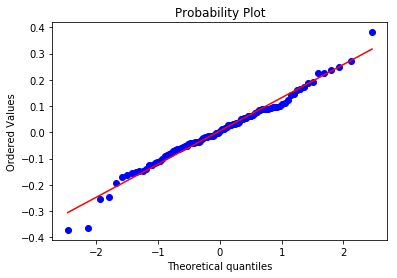

In [11]:
probplot(re2.resid, dist='norm', plot=plt);

### Terceira variavel a ser analisada: speechiness

In [12]:
quant3 = [ 'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness','key','acousticness', 'energy', 'danceability']

In [13]:
quant3_x = quant3.copy()

In [14]:
re3 = regre(dados.loc[:, quant3], dados.speechiness)
re3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            speechiness   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     18.89
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           2.25e-17
Time:                        18:16:30   Log-Likelihood:                 106.99
No. Observations:                 100   AIC:                            -196.0
Df Residuals:                      91   BIC:                            -172.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
instrumentalness    -0.4284      0.343     -1.248      0.215      -1.110       0.254
liveness            -0.0615      0.113     -0.545      0.587      -0.286       0.163
valence              0.0137      0.051      0.266      0.791      -0.089       0.116
tempo                0.0001      0.000      0.438      0.663      -0.001       0.001
loudness            -0.0201      0.006     -3.443      0.001      -0.032      -0.009
key                  0.0006      0.002      0.254      0.800      -0.004       0.005
acousticness        -0.0935      0.056     -1.675      0.097      -0.204       0.017
energy              -0.0386      0.069     -0.562      0.575      -0.175       0.098
danceability         0.0240      0.069      0.347      0.730      -0.114       0.162
==============================================================================
Omnibus:                       15.105   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.829
Skew:                           0.962   Prob(JB):                     0.000222
Kurtosis:                       3.581   Cond. No.                     4.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

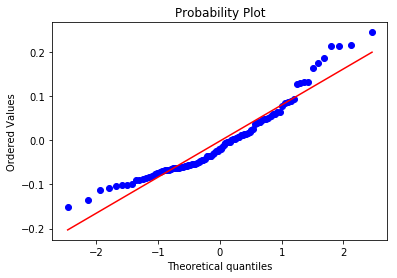

In [15]:
probplot(re3.resid, dist='norm', plot=plt);

Fazendo uma análise da variável 'speechiness', podemos observar que as probabilidades de Omnibus e de Jarque-Bera(JB) não são nulas, portanto, podemos confiar nos valores do p value mostrados na tabela. Temos que os valores do p value estão um pouo altos, o que indica que talvez não tenha uma forte relação com as outras variáveis. Pelo gráfico, observamos que a distibuição se aproxima de uma normal, salvo alguns outliers. Além disso, obtivemos um bom índice do R-squared (65%), porém, não podemos afirmar que a variável 'speechiness' é fortemente relacionada com as demais.

### Quarta variavel a ser analisada: instrumentalness

In [16]:
quant4 = [ 'liveness', 'valence', 'tempo', 'loudness','key','acousticness', 'energy', 'danceability', 'speechiness']

In [17]:
quant4_x = quant4.copy()

In [18]:
re4 = regre(dados.loc[:, quant4], dados.instrumentalness)
re4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       instrumentalness   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.002
Date:                Thu, 22 Nov 2018   Prob (F-statistic):              0.444
Time:                        18:16:31   Log-Likelihood:                 226.47
No. Observations:                 100   AIC:                            -434.9
Df Residuals:                      91   BIC:                            -411.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
liveness        -0.0315      0.034     -0.925      0.358      -0.099       0.036
valence         -0.0067      0.016     -0.428      0.670      -0.038       0.024
tempo         3.929e-05   9.88e-05      0.398      0.692      -0.000       0.000
loudness        -0.0019      0.002     -1.027      0.307      -0.006       0.002
key             -0.0006      0.001     -0.875      0.384      -0.002       0.001
acousticness    -0.0129      0.017     -0.753      0.453      -0.047       0.021
energy           0.0202      0.021      0.978      0.331      -0.021       0.061
danceability    -0.0084      0.021     -0.399      0.691      -0.050       0.033
speechiness     -0.0393      0.031     -1.248      0.215      -0.102       0.023
==============================================================================
Omnibus:                      155.879   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6468.167
Skew:                           5.863   Prob(JB):                         0.00
Kurtosis:                      40.615   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fazendo uma análise da variável 'instrumentalness', podemos observar que as probabilidades de Omnibus e de Jarque-Bera(JB) são nulas, portanto, não podemos confiar nos valores do p value mostrados na tabela. Ainda, obtivemos um baixo índice do R-squared (9%), ou seja, não podemos afirmar que a variável 'instrumentalness' é fortemente relacionada com as demais.

### Quinta variavel a ser analisada: liveness - NÃO É RELEVANTE

In [19]:
quant5 = [ 'valence', 'tempo', 'loudness','key','acousticness', 'energy', 'danceability', 'speechiness', 'instrumentalness']

In [20]:
quant5_x = quant5.copy()

In [50]:
re5 = regre(dados.loc[:, quant5], dados.liveness)
re5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               liveness   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     39.18
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           1.47e-27
Time:                        18:17:23   Log-Likelihood:                 114.57
No. Observations:                 100   AIC:                            -211.1
Df Residuals:                      91   BIC:                            -187.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
valence             -0.0021      0.048     -0.043      0.966      -0.097       0.093
tempo                0.0001      0.000      0.345      0.731      -0.000       0.001
loudness            -0.0081      0.006     -1.417      0.160      -0.019       0.003
key                 -0.0006      0.002     -0.286      0.775      -0.005       0.004
acousticness        -0.0444      0.052     -0.850      0.398      -0.148       0.059
energy               0.1529      0.062      2.481      0.015       0.030       0.275
danceability         0.0145      0.064      0.226      0.822      -0.113       0.142
speechiness         -0.0529      0.097     -0.545      0.587      -0.246       0.140
instrumentalness    -0.2954      0.319     -0.925      0.358      -0.930       0.339
==============================================================================
Omnibus:                       22.901   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.957
Skew:                           1.173   Prob(JB):                     3.13e-07
Kurtosis:                       4.300   Cond. No.                     4.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fazendo uma análise da variável 'liveness', podemos observar que as probabilidades de Omnibus e de Jarque-Bera(JB) são praticamente nulas, portanto, não podemos confiar nos valores do p value mostrados na tabela. Ainda, obtivemos um alto índice do R-squared (79%), porém, não podemos afirmar que a variável 'instrumentalness' é fortemente relacionada com as demais.

### Sexta variavel a ser analisada: valence - BOM

In [23]:
quant6 = [ 'tempo', 'loudness','key','acousticness', 'energy', 'danceability', 'speechiness', 'liveness']

In [24]:
quant6_x = quant6.copy()

In [25]:
re = regre(dados.loc[:, quant6], dados.valence)
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     114.5
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           2.08e-44
Time:                        18:16:32   Log-Likelihood:                 35.766
No. Observations:                 100   AIC:                            -55.53
Df Residuals:                      92   BIC:                            -34.69
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
tempo           -0.0006      0.001     -0.843      0.401      -0.002       0.001
loudness         0.0307      0.012      2.531      0.013       0.007       0.055
key              0.0001      0.005      0.025      0.980      -0.009       0.010
acousticness     0.2508      0.111      2.250      0.027       0.029       0.472
energy           0.3525      0.134      2.638      0.010       0.087       0.618
danceability     0.6804      0.121      5.607      0.000       0.439       0.921
speechiness      0.0687      0.211      0.326      0.745      -0.350       0.487
liveness        -0.0004      0.228     -0.002      0.999      -0.454       0.453
==============================================================================
Omnibus:                        0.579   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.748   Jarque-Bera (JB):                0.274
Skew:                           0.111   Prob(JB):                        0.872
Kurtosis:                       3.128   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

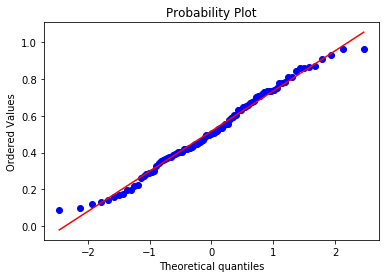

In [26]:
probplot(dados.valence, dist='norm', plot=plt);

### Setima variavel a ser analisada: tempo - MAIS OU MENOS

In [27]:
quant7 = [ 'loudness','key','acousticness', 'energy', 'danceability', 'speechiness', 'liveness', 'valence']

In [28]:
quant7_x = quant7.copy()

In [29]:
re = regre(dados.loc[:, quant7], dados.tempo)
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     230.7
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           2.09e-57
Time:                        18:16:33   Log-Likelihood:                -470.25
No. Observations:                 100   AIC:                             956.5
Df Residuals:                      92   BIC:                             977.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
loudness        -9.8734      1.687     -5.853      0.000     -13.224      -6.523
key             -0.1652      0.758     -0.218      0.828      -1.671       1.340
acousticness   -22.9273     17.884     -1.282      0.203     -58.446      12.592
energy         126.5694     17.401      7.274      0.000      92.010     161.129
danceability   -17.5711     22.077     -0.796      0.428     -61.418      26.276
speechiness     12.9954     33.186      0.392      0.696     -52.915      78.906
liveness        11.1608     35.950      0.310      0.757     -60.238      82.560
valence        -13.7989     16.369     -0.843      0.401     -46.309      18.712
==============================================================================
Omnibus:                        1.585   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.453   Jarque-Bera (JB):                1.254
Skew:                           0.272   Prob(JB):                        0.534
Kurtosis:                       3.073   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

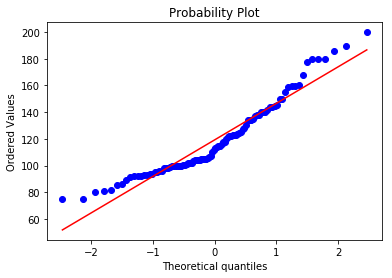

In [30]:
probplot(dados.tempo, dist='norm', plot=plt);

### Oitava variavel a ser analisada:  - R2 ALTO, ONIBUS BAIXO, MAS BOM

In [31]:
quant8 = [ 'key','acousticness', 'energy', 'danceability', 'speechiness', 'liveness', 'valence', 'tempo']

In [32]:
quant8_x = quant8.copy()

In [33]:
re = regre(dados.loc[:, quant8], dados.loudness)
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loudness   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     192.8
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           5.19e-54
Time:                        18:16:33   Log-Likelihood:                -176.05
No. Observations:                 100   AIC:                             368.1
Df Residuals:                      92   BIC:                             388.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
key             -0.0627      0.039     -1.588      0.116      -0.141       0.016
acousticness    -2.9945      0.899     -3.330      0.001      -4.781      -1.208
energy           3.8527      1.080      3.568      0.001       1.708       5.997
danceability    -5.9366      0.991     -5.988      0.000      -7.906      -3.967
speechiness     -5.5508      1.654     -3.356      0.001      -8.836      -2.266
liveness        -2.5124      1.880     -1.337      0.185      -6.245       1.220
valence          2.1217      0.838      2.531      0.013       0.457       3.787
tempo           -0.0275      0.005     -5.853      0.000      -0.037      -0.018
==============================================================================
Omnibus:                        2.645   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                2.127
Skew:                          -0.344   Prob(JB):                        0.345
Kurtosis:                       3.191   Cond. No.                     1.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

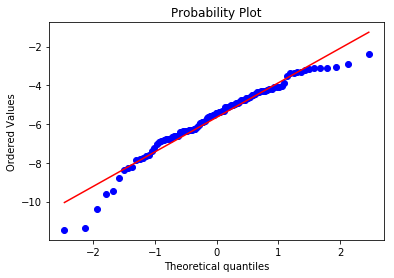

In [34]:
probplot(dados.loudness, dist='norm', plot=plt);

### Nona variavel a ser analisada: key - TIRAR

In [35]:
quant9 = [ 'acousticness', 'energy', 'danceability', 'speechiness', 'liveness', 'valence', 'tempo', 'loudness']

In [36]:
quant9_x = quant9.copy()

In [37]:
re = regre(dados.loc[:, quant9], dados.key)
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    key   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     26.81
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           5.92e-21
Time:                        18:16:33   Log-Likelihood:                -271.85
No. Observations:                 100   AIC:                             559.7
Df Residuals:                      92   BIC:                             580.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
acousticness     1.0699      2.479      0.432      0.667      -3.853       5.993
energy           6.2767      2.931      2.141      0.035       0.455      12.098
danceability    -1.2287      3.044     -0.404      0.687      -7.274       4.816
speechiness      1.7051      4.564      0.374      0.710      -7.360      10.770
liveness        -1.0150      4.945     -0.205      0.838     -10.837       8.807
valence          0.0570      2.260      0.025      0.980      -4.431       4.545
tempo           -0.0031      0.014     -0.218      0.828      -0.032       0.025
loudness        -0.4257      0.268     -1.588      0.116      -0.958       0.107
==============================================================================
Omnibus:                       35.151   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.507
Skew:                          -0.162   Prob(JB):                       0.0386
Kurtosis:                       1.793   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

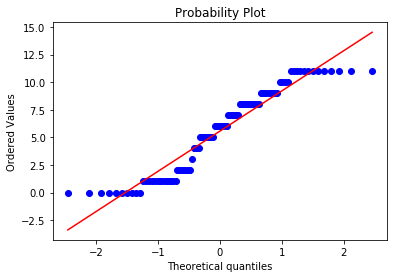

In [38]:
probplot(dados.key, dist='norm', plot=plt);

### Decima variavel a ser analisada: acousticness - MEIO RUIM, R2 BAIXO

In [39]:
quant = [ 'energy', 'danceability', 'speechiness', 'liveness', 'valence', 'tempo', 'loudness', 'key']

In [40]:
quant_x = quant.copy()

In [41]:
re = regre(dados.loc[:, quant], dados.acousticness)
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           acousticness   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     15.22
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           5.14e-14
Time:                        18:16:34   Log-Likelihood:                 45.117
No. Observations:                 100   AIC:                            -74.23
Df Residuals:                      92   BIC:                            -53.39
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
energy          -0.0174      0.126     -0.138      0.890      -0.268       0.233
danceability     0.0022      0.128      0.017      0.986      -0.252       0.256
speechiness     -0.3031      0.189     -1.601      0.113      -0.679       0.073
liveness        -0.1630      0.207     -0.787      0.433      -0.574       0.248
valence          0.2080      0.092      2.250      0.027       0.024       0.392
tempo           -0.0008      0.001     -1.282      0.203      -0.002       0.000
loudness        -0.0359      0.011     -3.330      0.001      -0.057      -0.014
key              0.0019      0.004      0.432      0.667      -0.007       0.011
==============================================================================
Omnibus:                       12.136   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.092
Skew:                           0.876   Prob(JB):                      0.00144
Kurtosis:                       3.265   Cond. No.                     1.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

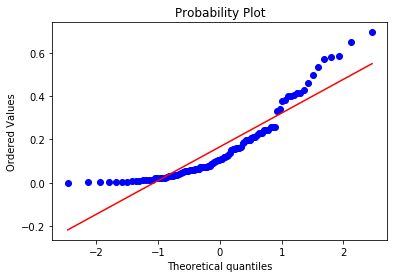

In [42]:
probplot(dados.acousticness, dist='norm', plot=plt);

In [43]:
df = pd.read_csv('dataset.csv')

In [44]:
df

,Unnamed: 0,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,nome,artista
0,0,0.28000,0.724,0.647,2rPE9A1vEgShuZxxzR2tZH,0.000000,1,0.1020,-5.642,0.0658,106.960,0.4350,"thank u, next",Ariana Grande
1,1,0.29700,0.752,0.488,5p7ujcrUXASCNwRaWNHR1C,0.000009,6,0.0936,-7.050,0.0705,136.041,0.5330,Without Me,Halsey
2,2,0.55100,0.753,0.498,1A6OTy97kk0mMdm78rHsm8,0.000000,2,0.0706,-5.610,0.0504,89.950,0.9270,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone
3,3,0.42300,0.665,0.699,5tAa8Uaqr4VvA3693mbIhU,0.000000,11,0.0969,-5.265,0.0578,124.896,0.5850,Ruin My Life,Zara Larsson
4,4,0.03020,0.703,0.723,2LskIZrCeLxRvCiGP8gxlh,0.000002,9,0.1260,-5.450,0.0412,104.969,0.2880,Arms Around You (feat. Maluma & Swae Lee),XXXTENTACION
5,5,0.17300,0.757,0.849,6rrTr2HEAzlpC4KWZxF3S1,0.000000,5,0.0878,-3.424,0.0536,150.036,0.8260,Woman Like Me (feat. Nicki Minaj),Little Mix
6,6,0.07220,0.383,0.637,2RSHsoi04658QL5xgQVov3,0.000000,3,0.3680,-6.993,0.0703,177.913,0.0827,Bad Liar,Imagine Dragons
7,7,0.37400,0.693,0.575,14sOS5L36385FJ3OL8hew4,0.000000,9,0.2520,-6.998,0.0801,117.999,0.4920,Happy Now (feat. Sandro Cavazza),Kygo
8,8,0.09690,0.574,0.758,5JEx7HbmvHQQswJCsoo9rA,0.000000,1,0.3950,-5.029,0.0621,144.111,0.4920,Close To Me (with Diplo) (feat. Swae Lee),Ellie Goulding
9,9,0.97900,0.498,0.104,14JzyD6FlBD5z0wV5P07YI,0.000079,1,0.0895,-14.080,0.0621,124.001,0.2050,when the party's over,Billie Eilish


In [45]:
top10 = []
for i in range(50):
    if i < 10:
        top10.append(1)
    else:
        top10.append(0)


In [46]:
quantitativas = [ 'energy', 'danceability', 'speechiness', 'liveness', 'valence', 'tempo', 'loudness', 'key', 'instrumentalness']

In [47]:
resultado = regre(df.loc[:, quantitativas], top10)
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     2.055
Date:                Thu, 22 Nov 2018   Prob (F-statistic):             0.0571
Time:                        18:16:34   Log-Likelihood:                -21.403
No. Observations:                  50   AIC:                             60.81
Df Residuals:                      41   BIC:                             78.01
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
energy               0.1609      0.470      0.343      0.734      -0.788       1.109
danceability        -0.5124      0.506     -1.013      0.317      -1.534       0.509
speechiness         -1.3058      1.042     -1.254      0.217      -3.409       0.798
liveness            -0.1899      0.377     -0.504      0.617      -0.952       0.572
valence              0.4361      0.356      1.226      0.227      -0.282       1.155
tempo                0.0007      0.002      0.309      0.759      -0.004       0.005
loudness            -0.0518      0.032     -1.604      0.116      -0.117       0.013
key                  0.0042      0.018      0.232      0.818      -0.033       0.041
instrumentalness    -0.9620      1.225     -0.785      0.437      -3.436       1.512
==============================================================================
Omnibus:                       10.452   Durbin-Watson:                   0.303
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.570
Skew:                           1.178   Prob(JB):                      0.00307
Kurtosis:                       2.917   Cond. No.                     2.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

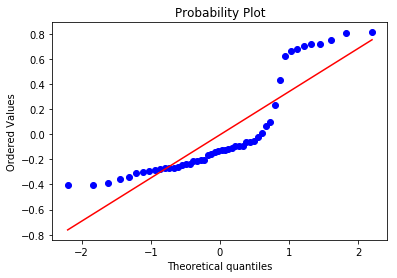

In [48]:
probplot(resultado.resid, dist='norm', plot=plt);